In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import math
from sklearn.mixture import GaussianMixture

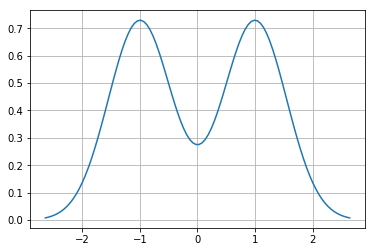

In [52]:

mu_1 = -1
mu_2 = 1
variance = .3
sigma = math.sqrt(variance)
x = np.linspace(mu_1 - 3*sigma, mu_2 + 3*sigma, 100)
# x = (x -np.mean(x)) / np.std(x)

points = stats.norm.pdf(x, mu_1, sigma)+stats.norm.pdf(x, mu_2, sigma)
plt.plot(x, points)
plt.grid(True)
plt.show()

In [59]:
gm = GaussianMixture(1)
gm.fit(x.reshape(-1, 1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [60]:
gm.means_

array([[-2.22044605e-17]])

In [61]:
gm.covariances_

array([[[2.37582548]]])

In [62]:
from scipy.stats import norm
mean,std=norm.fit(x)
mean, std

(-1.2434497875801754e-16, 1.5413709733880205)

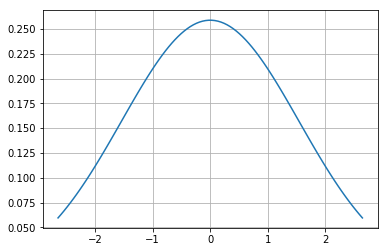

In [63]:
for mu, std in zip(gm.means_, np.sqrt(gm.covariances_.flatten())):
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p)
plt.grid(True)

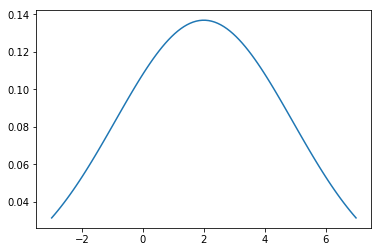

In [20]:
points = stats.norm.pdf(x, mean, std)
plt.plot(x, points)

In [4]:
data = pd.DataFrame({'real': [5, 3, 4, 1], 'fake': [6, 2, 4, 1.5]})

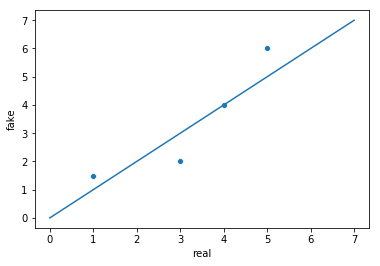

In [13]:
line = [0, 7]
sns.lineplot(x=line, y=line)
sns.scatterplot(x=data['real'], y=data['fake'])


In [21]:
data2 = pd.DataFrame({'real': [2, 4, 4, 5], 'fake': [1, 3, 4, 4]})

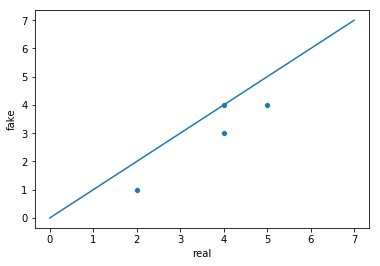

In [22]:
line = [0, 7]
sns.lineplot(x=line, y=line)
sns.scatterplot(x=data2['real'], y=data2['fake'])


In [23]:
data = pd.DataFrame({'real':[0.7685, 0.9859, 0.7128, 0.9237], 'fake': [0.7353, 0.9748, 0.7025, 0.9406]})

In [24]:
y = np.abs((data.real - data.fake) / data.real)

Text(0.5, 1.0, 'Absolute Percentage Error')

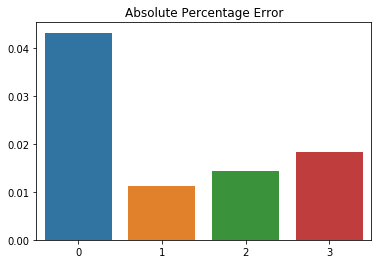

In [25]:
sns.barplot(x=y.index, y=y)
plt.title('Absolute Percentage Error')